In [43]:
import pandas as pd

# Path to your large dataset
file_path = 'transactions_data.csv'

# Define your chunk size (e.g., 50000 rows per chunk)
chunk_size = 50000

# This returns an iterator
chunk_iterator = pd.read_csv(file_path, chunksize=chunk_size)

# Process each chunk
for chunk in chunk_iterator:
    # Example: just display the first few rows from each chunk
    print(chunk.head())
    # You can also do operations like filtering, saving, etc.


        id                 date  client_id  card_id   amount  \
0  7475327  2010-01-01 00:01:00       1556     2972  $-77.00   
1  7475328  2010-01-01 00:02:00        561     4575   $14.57   
2  7475329  2010-01-01 00:02:00       1129      102   $80.00   
3  7475331  2010-01-01 00:05:00        430     2860  $200.00   
4  7475332  2010-01-01 00:06:00        848     3915   $46.41   

            use_chip  merchant_id merchant_city merchant_state      zip   mcc  \
0  Swipe Transaction        59935        Beulah             ND  58523.0  5499   
1  Swipe Transaction        67570    Bettendorf             IA  52722.0  5311   
2  Swipe Transaction        27092         Vista             CA  92084.0  4829   
3  Swipe Transaction        27092   Crown Point             IN  46307.0  4829   
4  Swipe Transaction        13051       Harwood             MD  20776.0  5813   

  errors  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
            id                 date  client_id  card_id   amou

In [44]:
for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):
    chunk.to_csv(f'data/chunk_{i}.csv', index=False)


In [45]:
##########remove all null values

import os
import glob

# Get all chunk files from 'data/' (excluding already cleaned ones)
chunk_files = glob.glob('data/chunk_*.csv')

for file in chunk_files:
    df = pd.read_csv(file)
    df_cleaned = df.dropna()
    
    # Get the file name like 'chunk_0.csv'
    filename = os.path.basename(file)
    
    # Create new name for cleaned file
    cleaned_filename = filename.replace('.csv', '_cleaned.csv')
    
    # Save to the existing cleaned folder
    df_cleaned.to_csv(f'data/cleaned data/{cleaned_filename}', index=False)
    
    print(f"Cleaned and saved: {cleaned_filename}")



Cleaned and saved: chunk_0_cleaned.csv
Cleaned and saved: chunk_1_cleaned.csv
Cleaned and saved: chunk_10_cleaned.csv
Cleaned and saved: chunk_100_cleaned.csv
Cleaned and saved: chunk_101_cleaned.csv
Cleaned and saved: chunk_102_cleaned.csv
Cleaned and saved: chunk_103_cleaned.csv
Cleaned and saved: chunk_104_cleaned.csv
Cleaned and saved: chunk_105_cleaned.csv
Cleaned and saved: chunk_106_cleaned.csv
Cleaned and saved: chunk_107_cleaned.csv
Cleaned and saved: chunk_108_cleaned.csv
Cleaned and saved: chunk_109_cleaned.csv
Cleaned and saved: chunk_11_cleaned.csv
Cleaned and saved: chunk_110_cleaned.csv
Cleaned and saved: chunk_111_cleaned.csv
Cleaned and saved: chunk_112_cleaned.csv
Cleaned and saved: chunk_113_cleaned.csv
Cleaned and saved: chunk_114_cleaned.csv
Cleaned and saved: chunk_115_cleaned.csv
Cleaned and saved: chunk_116_cleaned.csv
Cleaned and saved: chunk_117_cleaned.csv
Cleaned and saved: chunk_118_cleaned.csv
Cleaned and saved: chunk_119_cleaned.csv
Cleaned and saved: chu

In [46]:
#######remove duplicate value if existed

# Get all cleaned chunk files
cleaned_files = glob.glob('data/cleaned data/chunk_*_cleaned.csv')

for file in cleaned_files:
    df = pd.read_csv(file)

    # Find duplicate rows (excluding the first occurrence)
    duplicates = df[df.duplicated()]
    
    if not duplicates.empty:
        print(f"\nDuplicate rows found in: {os.path.basename(file)}")
        print(duplicates)
    else:
        print(f"No duplicates found in: {os.path.basename(file)}")
    
    # Drop duplicate rows
    df = df.drop_duplicates()
    
    # Overwrite the same file
    df.to_csv(file, index=False)


No duplicates found in: chunk_0_cleaned.csv
No duplicates found in: chunk_100_cleaned.csv
No duplicates found in: chunk_101_cleaned.csv
No duplicates found in: chunk_102_cleaned.csv
No duplicates found in: chunk_103_cleaned.csv
No duplicates found in: chunk_104_cleaned.csv
No duplicates found in: chunk_105_cleaned.csv
No duplicates found in: chunk_106_cleaned.csv
No duplicates found in: chunk_107_cleaned.csv
No duplicates found in: chunk_108_cleaned.csv
No duplicates found in: chunk_109_cleaned.csv
No duplicates found in: chunk_10_cleaned.csv
No duplicates found in: chunk_110_cleaned.csv
No duplicates found in: chunk_111_cleaned.csv
No duplicates found in: chunk_112_cleaned.csv
No duplicates found in: chunk_113_cleaned.csv
No duplicates found in: chunk_114_cleaned.csv
No duplicates found in: chunk_115_cleaned.csv
No duplicates found in: chunk_116_cleaned.csv
No duplicates found in: chunk_117_cleaned.csv
No duplicates found in: chunk_118_cleaned.csv
No duplicates found in: chunk_119_cle

In [47]:
import pandas as pd
import glob
import os

chunk_size = 50000
chunk_num = 0

# Get all cleaned chunk files
cleaned_files = glob.glob('data/cleaned data/chunk_*_cleaned.csv')

for file_path in cleaned_files:
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Only process if 'date' column exists
        if 'date' in chunk.columns:
            chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
            chunk['hour'] = chunk['date'].dt.hour
            chunk['dayofweek'] = chunk['date'].dt.dayofweek
            chunk['is_weekend'] = chunk['dayofweek'].isin([5, 6]).astype(int)
            chunk.drop(columns=['date'], inplace=True)

        # Drop 'id' column if it exists
        if 'id' in chunk.columns:
            chunk.drop(columns=['id'], inplace=True)

        # Process 'amount' column
        if 'amount' in chunk.columns:
            chunk['amount'] = chunk['amount'].astype(str).str.replace(r'\$', '', regex=True).astype(float)

        # Save processed chunk
        output_path = f'data/cleaned data/chunk_{chunk_num}_cleaned.csv'
        chunk.to_csv(output_path, index=False)
        print(f"✅ Saved: {output_path}")
        chunk_num += 1


✅ Saved: data/cleaned data/chunk_0_cleaned.csv
✅ Saved: data/cleaned data/chunk_1_cleaned.csv
✅ Saved: data/cleaned data/chunk_2_cleaned.csv
✅ Saved: data/cleaned data/chunk_3_cleaned.csv
✅ Saved: data/cleaned data/chunk_4_cleaned.csv
✅ Saved: data/cleaned data/chunk_5_cleaned.csv
✅ Saved: data/cleaned data/chunk_6_cleaned.csv
✅ Saved: data/cleaned data/chunk_7_cleaned.csv
✅ Saved: data/cleaned data/chunk_8_cleaned.csv
✅ Saved: data/cleaned data/chunk_9_cleaned.csv
✅ Saved: data/cleaned data/chunk_10_cleaned.csv
✅ Saved: data/cleaned data/chunk_11_cleaned.csv
✅ Saved: data/cleaned data/chunk_12_cleaned.csv
✅ Saved: data/cleaned data/chunk_13_cleaned.csv
✅ Saved: data/cleaned data/chunk_14_cleaned.csv
✅ Saved: data/cleaned data/chunk_15_cleaned.csv
✅ Saved: data/cleaned data/chunk_16_cleaned.csv
✅ Saved: data/cleaned data/chunk_17_cleaned.csv
✅ Saved: data/cleaned data/chunk_18_cleaned.csv
✅ Saved: data/cleaned data/chunk_19_cleaned.csv
✅ Saved: data/cleaned data/chunk_20_cleaned.csv
✅ 

In [48]:
import pandas as pd
import glob

# Load your data
encoded_files = glob.glob('data/cleaned data/chunk_*_cleaned.csv')
df = pd.concat([pd.read_csv(f) for f in encoded_files], ignore_index=True)

# Get all unique error types
all_errors = set()
df['errors'] = df['errors'].astype(str)
for val in df['errors']:
    for err in val.split(','):
        all_errors.add(err.strip())

# Remove empty strings if any
all_errors.discard('')

# Assign integer codes
error2int = {err: idx for idx, err in enumerate(sorted(all_errors))}
print(error2int)

{'Bad CVV': 0, 'Bad Card Number': 1, 'Bad PIN': 2, 'Bad Zipcode': 3, 'Insufficient Balance': 4, 'Technical Glitch': 5}


In [49]:
def encode_errors(error_str):
    return [error2int[err.strip()] for err in error_str.split(',') if err.strip() in error2int]

df['errors_encoded'] = df['errors'].apply(encode_errors)

print(df.head())

   client_id  card_id  amount           use_chip  merchant_id merchant_city  \
0        464     3233  104.10  Swipe Transaction        32175       Orlando   
1       1424     4710  -72.00  Swipe Transaction        59935       Kingman   
2        843      184   37.54  Swipe Transaction        89462   Terre Haute   
3       1424     4710   72.00  Swipe Transaction        59935       Kingman   
4        319      248  104.81  Swipe Transaction         9263        Fresno   

  merchant_state      zip   mcc                errors  hour  dayofweek  \
0             FL  32804.0  7538      Technical Glitch     4          4   
1             AZ  86401.0  5499  Insufficient Balance     7          4   
2             IN  47805.0  5300  Insufficient Balance     7          4   
3             AZ  86401.0  5499  Insufficient Balance     7          4   
4             CA  93727.0  5912  Insufficient Balance     7          4   

   is_weekend errors_encoded  
0           0            [5]  
1           0     

In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
errors_onehot = pd.DataFrame(mlb.fit_transform(df['errors_encoded']), columns=[f'error_{i}' for i in mlb.classes_])

# Drop the old 'errors' columns and add the new one-hot columns
df = df.drop(['errors', 'errors_encoded'], axis=1)
df = pd.concat([df, errors_onehot], axis=1)

print(df.head())


   client_id  card_id  amount           use_chip  merchant_id merchant_city  \
0        464     3233  104.10  Swipe Transaction        32175       Orlando   
1       1424     4710  -72.00  Swipe Transaction        59935       Kingman   
2        843      184   37.54  Swipe Transaction        89462   Terre Haute   
3       1424     4710   72.00  Swipe Transaction        59935       Kingman   
4        319      248  104.81  Swipe Transaction         9263        Fresno   

  merchant_state      zip   mcc  hour  dayofweek  is_weekend  error_0  \
0             FL  32804.0  7538     4          4           0        0   
1             AZ  86401.0  5499     7          4           0        0   
2             IN  47805.0  5300     7          4           0        0   
3             AZ  86401.0  5499     7          4           0        0   
4             CA  93727.0  5912     7          4           0        0   

   error_1  error_2  error_3  error_4  error_5  
0        0        0        0        0

In [51]:
import os

# Make sure the output directory exists
os.makedirs('data/encoded data/encoded_chunk_', exist_ok=True)

# Assuming you want to split by the same chunk size as original
chunk_size = len(df) // len(encoded_files)
for i, start in enumerate(range(0, len(df), chunk_size)):
    chunk = df.iloc[start:start+chunk_size]
    chunk.to_csv(f'data/encoded data/encoded_chunk_{i}_cleaned.csv', index=False)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder


In [53]:

original_features= df.columns

print("original feature count :", len(original_features))
print('original_features :', original_features)
print(df.head(5))

original feature count : 18
original_features : Index(['client_id', 'card_id', 'amount', 'use_chip', 'merchant_id',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour', 'dayofweek',
       'is_weekend', 'error_0', 'error_1', 'error_2', 'error_3', 'error_4',
       'error_5'],
      dtype='object')
   client_id  card_id  amount           use_chip  merchant_id merchant_city  \
0        464     3233  104.10  Swipe Transaction        32175       Orlando   
1       1424     4710  -72.00  Swipe Transaction        59935       Kingman   
2        843      184   37.54  Swipe Transaction        89462   Terre Haute   
3       1424     4710   72.00  Swipe Transaction        59935       Kingman   
4        319      248  104.81  Swipe Transaction         9263        Fresno   

  merchant_state      zip   mcc  hour  dayofweek  is_weekend  error_0  \
0             FL  32804.0  7538     4          4           0        0   
1             AZ  86401.0  5499     7          4           0        0

In [54]:
print(df.head())

   client_id  card_id  amount           use_chip  merchant_id merchant_city  \
0        464     3233  104.10  Swipe Transaction        32175       Orlando   
1       1424     4710  -72.00  Swipe Transaction        59935       Kingman   
2        843      184   37.54  Swipe Transaction        89462   Terre Haute   
3       1424     4710   72.00  Swipe Transaction        59935       Kingman   
4        319      248  104.81  Swipe Transaction         9263        Fresno   

  merchant_state      zip   mcc  hour  dayofweek  is_weekend  error_0  \
0             FL  32804.0  7538     4          4           0        0   
1             AZ  86401.0  5499     7          4           0        0   
2             IN  47805.0  5300     7          4           0        0   
3             AZ  86401.0  5499     7          4           0        0   
4             CA  93727.0  5912     7          4           0        0   

   error_1  error_2  error_3  error_4  error_5  
0        0        0        0        0

In [55]:
import pandas as pd
import os
import json
import numpy as np

input_folder = "data/encoded data"
output_folder = "data/encoded data"
os.makedirs(output_folder, exist_ok=True)

# Only include columns you still need to encode
categorical_cols = ['use_chip', 'merchant_city', 'merchant_state']


encoding_maps = {}
for col in categorical_cols:
    unique_values = set()
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv") and "chunk_" and "_cleaned" in filename:
            df = pd.read_csv(os.path.join(input_folder, filename))
            if col in df.columns:
                unique_values.update(df[col].astype(str).unique())
    encoding_maps[col] = {val: idx for idx, val in enumerate(sorted(unique_values))}

# Save encoding map (optional)
with open("mapping.json", "w") as f:
    json.dump(encoding_maps, f, indent=2)


def simulate_fraud(row):
    risky_states = {'NV', 'FL', 'LA', 'TX'}
    # Check if the encoded merchant_state is in the set of risky states
    state_risk = row['merchant_state'] in [encoding_maps['merchant_state'].get(s, -1) for s in risky_states]
    chip_risk = row['use_chip'] == 0
    # No error_risk since 'errors' is already encoded and not needed here
    return int(state_risk and chip_risk)



for filename in os.listdir(input_folder):
    if filename.endswith(".csv") and "chunk_" and "_cleaned" in filename:
        input_path = os.path.join(input_folder, filename)
        df = pd.read_csv(input_path)
        print(f"🔄 Encoding: {filename}")

        # Ensure all categorical columns are string
        for col in categorical_cols:
            if col in df.columns:
                df[col] = df[col].astype(str)

        # Apply encoding
        for col in categorical_cols:
            if col not in df.columns:
                continue
            mapping = encoding_maps[col]
            def encode_value(val):
                if ',' in val:
                    parts = [v.strip() for v in val.split(',')]
                    return ','.join(str(mapping.get(p, -1)) for p in parts)
                else:
                    return mapping.get(val.strip(), -1)
            df[col] = df[col].apply(encode_value)

        # Add simulated fraud column
        df["is_fraud"] = df.apply(simulate_fraud, axis=1)

        # Save encoded chunk
        output_path = os.path.join(output_folder, f"encoded_{filename}")
        df.to_csv(output_path, index=False)
        print(f"✅ Saved: {output_path}")


        


🔄 Encoding: encoded_chunk_0_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_0_cleaned.csv
🔄 Encoding: encoded_chunk_100_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_100_cleaned.csv
🔄 Encoding: encoded_chunk_101_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_101_cleaned.csv
🔄 Encoding: encoded_chunk_102_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_102_cleaned.csv
🔄 Encoding: encoded_chunk_103_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_103_cleaned.csv
🔄 Encoding: encoded_chunk_104_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_104_cleaned.csv
🔄 Encoding: encoded_chunk_105_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_105_cleaned.csv
🔄 Encoding: encoded_chunk_106_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_106_cleaned.csv
🔄 Encoding: encoded_chunk_107_cleaned.csv
✅ Saved: data/encoded data\encoded_encoded_chunk_107_cleaned.csv
🔄 Encoding: encoded_chunk_108_cleaned.csv

In [56]:
import json

with open("mapping.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Export the loaded JSON to a file
with open("mapping.json", "w", encoding="utf-8") as out_f:
    json.dump(data, out_f, indent=2, ensure_ascii=False)

print("✅ JSON mapping exported to exported_mapping.json")


✅ JSON mapping exported to exported_mapping.json


In [57]:
print(df.head())

   client_id  card_id  amount  use_chip  merchant_id  merchant_city  \
0        356     5279    6.24         0        61195           4137   
1        872     5064    2.94         0        25887           2611   
2       1575     5582    1.03         0        14528           3839   
3        506     1032  118.92         0        14801           2282   
4       1398     3524  141.96         1        91128           3267   

   merchant_state      zip   mcc  hour  dayofweek  is_weekend  error_0  \
0               9  34997.0  5541     7          0           0        0   
1              14  60153.0  5814     8          0           0        0   
2               9  34235.0  5499     8          0           0        0   
3              34  14085.0  5655     8          0           0        0   
4              31   7055.0  5411    10          0           0        0   

   error_1  error_2  error_3  error_4  error_5  is_fraud  
0        0        0        0        1        0         1  
1        0

In [58]:
print(df.columns)
print(df.head())

Index(['client_id', 'card_id', 'amount', 'use_chip', 'merchant_id',
       'merchant_city', 'merchant_state', 'zip', 'mcc', 'hour', 'dayofweek',
       'is_weekend', 'error_0', 'error_1', 'error_2', 'error_3', 'error_4',
       'error_5', 'is_fraud'],
      dtype='object')
   client_id  card_id  amount  use_chip  merchant_id  merchant_city  \
0        356     5279    6.24         0        61195           4137   
1        872     5064    2.94         0        25887           2611   
2       1575     5582    1.03         0        14528           3839   
3        506     1032  118.92         0        14801           2282   
4       1398     3524  141.96         1        91128           3267   

   merchant_state      zip   mcc  hour  dayofweek  is_weekend  error_0  \
0               9  34997.0  5541     7          0           0        0   
1              14  60153.0  5814     8          0           0        0   
2               9  34235.0  5499     8          0           0        0   
3  

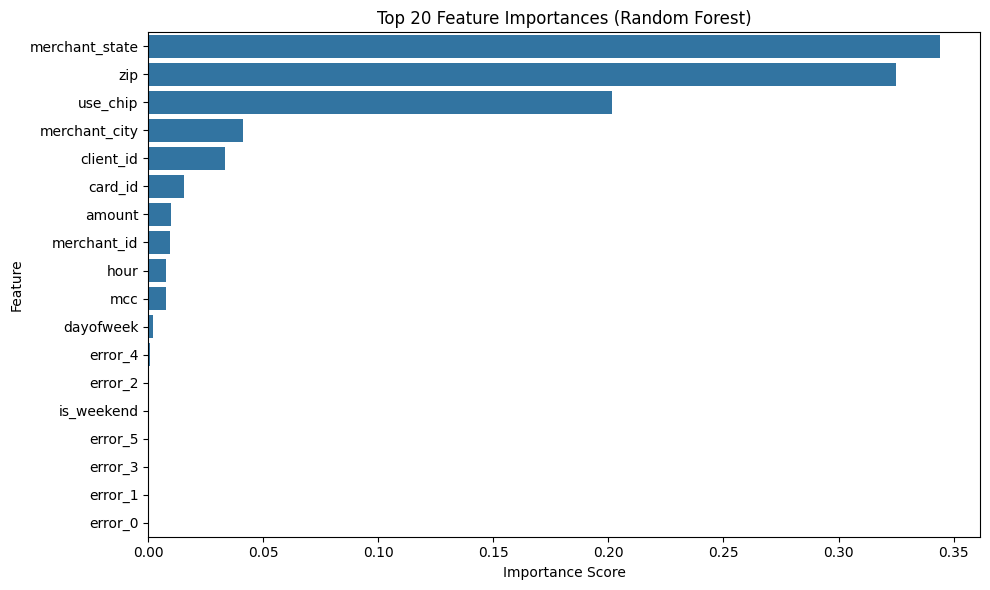

In [1]:
import pandas as pd
import glob
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and combine all encoded chunks
encoded_files = glob.glob('data/encoded data/encoded_encoded_chunk_*_cleaned.csv')
df = pd.concat([pd.read_csv(f) for f in encoded_files], ignore_index=True)

# 2. Split features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


# 3. Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 3. Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 4. Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# 5. Select top N features
top_n = 20
indices = importances.argsort()[-top_n:][::-1]
top_features = feature_names[indices]
top_importances = importances[indices]

# 6. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [5]:
print(model)

RandomForestClassifier(random_state=42)


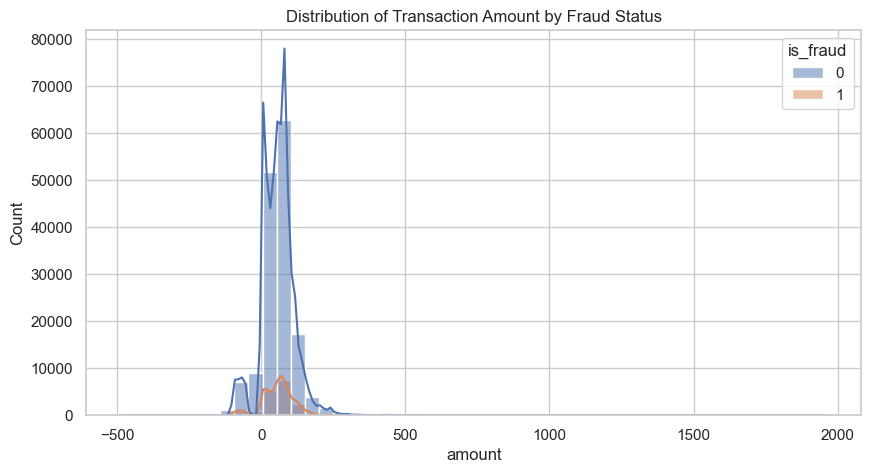

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Optional: seaborn style
sns.set_theme(style='whitegrid')

# STEP 1: Load the mapping.json
with open("mapping.json", "r") as f:
    mapping = json.load(f)

# STEP 2: Reverse mappings
for key in mapping:
    mapping[key] = {v: k for k, v in mapping[key].items()}

# STEP 3: Decode categorical features
df['use_chip_decoded'] = df['use_chip'].map(mapping['use_chip'])
df['merchant_state_decoded'] = df['merchant_state'].map(mapping['merchant_state'])

# STEP 4: Plot numerical feature: amount
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='amount', hue='is_fraud', bins=50, kde=True)
plt.title("Distribution of Transaction Amount by Fraud Status")
plt.show()



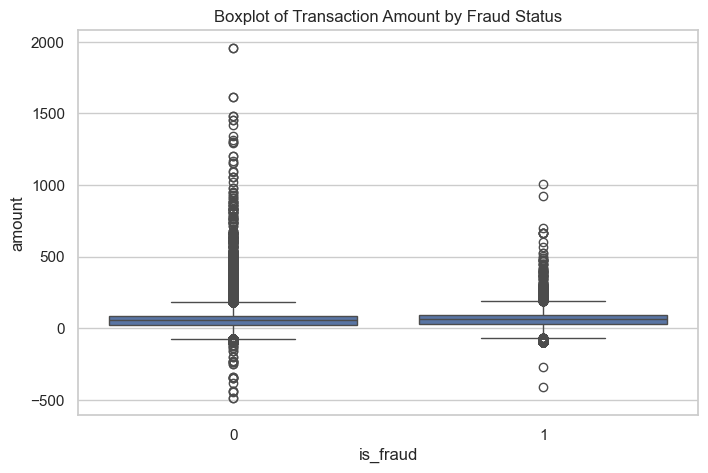

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_fraud', y='amount')
plt.title("Boxplot of Transaction Amount by Fraud Status")
plt.show()



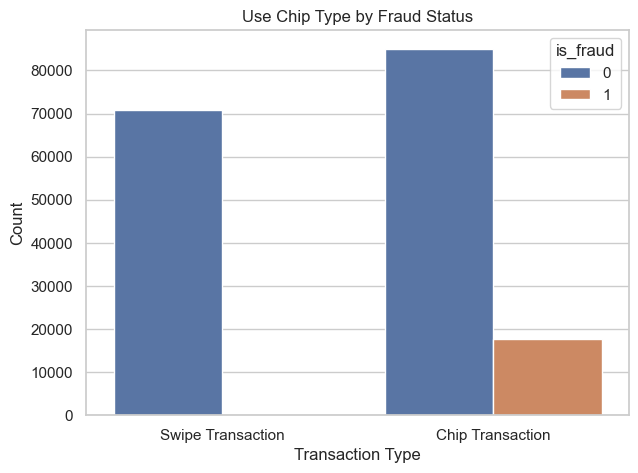

In [85]:
# STEP 5: Plot categorical: use_chip
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='use_chip_decoded', hue='is_fraud')
plt.title("Use Chip Type by Fraud Status")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()



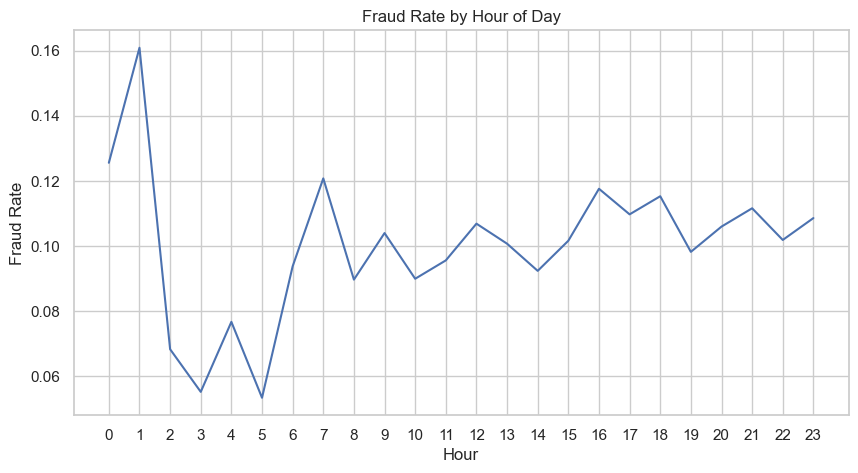

In [86]:
# STEP 6: Plot time-based feature: hour
hourly_fraud = df.groupby('hour')['is_fraud'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_fraud, x='hour', y='is_fraud')
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Fraud Rate")
plt.xticks(range(0, 24))
plt.show()



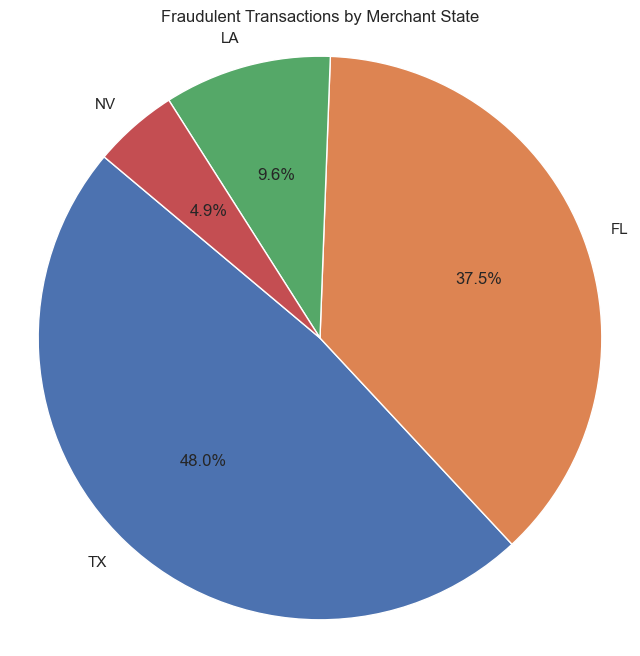

In [94]:
# STEP 7: Plot merchant_state as pie chart (fraud only)
fraud_df = df[df['is_fraud'] == 1]
fraud_by_state = fraud_df['merchant_state_decoded'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8))
plt.pie(fraud_by_state, labels=fraud_by_state.index, autopct='%1.1f%%', startangle=140)
plt.title("Fraudulent Transactions by Merchant State")
plt.axis('equal')
plt.show()




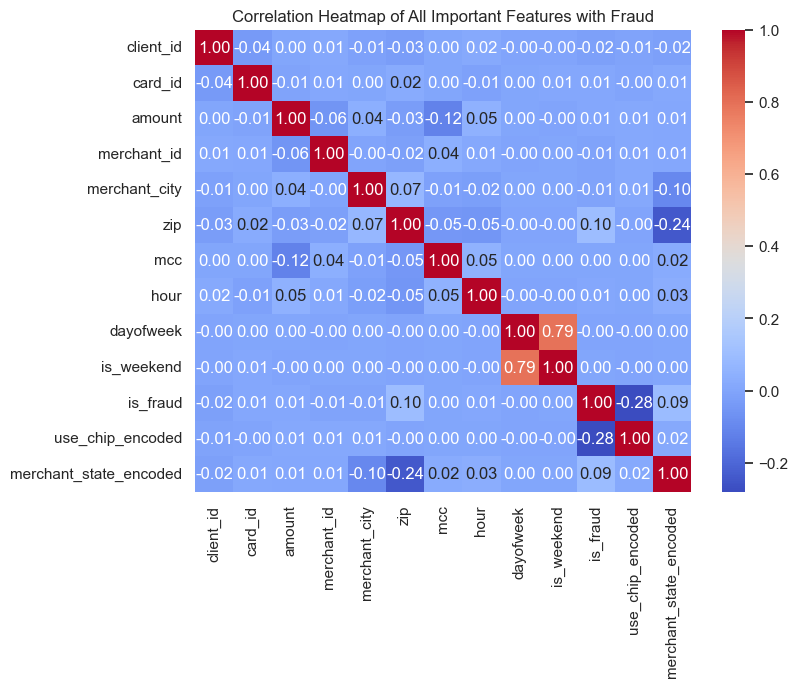

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Temporarily convert decoded categorical columns back to numeric
df['use_chip_encoded'] = df['use_chip_decoded'].astype('category').cat.codes
df['merchant_state_encoded'] = df['merchant_state_decoded'].astype('category').cat.codes

# Step 2: Define all features (numerical + encoded categorical)
features_for_corr = [
    'client_id', 
    'card_id', 
    'amount', 
    'merchant_id',
    'merchant_city',  
    'zip', 
    'mcc', 
    'hour', 
    'dayofweek',
    'is_weekend',  
    'is_fraud', 
    'use_chip_encoded', 
    'merchant_state_encoded',
]

# Step 3: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[features_for_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Important Features with Fraud")
plt.show()


In [3]:
import joblib
joblib.dump(model, "rf_model.pkl")


['rf_model.pkl']